# Taller No. 1 - Problema 2

Objetivo. La idea es tratar de preprocesar el dataset **Europarl** (Large Corpus Spanish), tokenizarlo, limpiarlo, obtener el modelo de embedding usando Fasttext y comparar la similaridad con el modelo **Word2vec**

Integrantes:

- Danilo Arvalo
- William Ballesteros
- Mavelyn Sterling

## Problema 2

Experimentar sobre el word2vec-scratch el siguiente texto "Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos prehistóricos”. Entrenar el conjunto de palabras del texto, proponga como parámetros, vectores de dimensión 30 y 50 con ajuste de ventana de 3. Crear un procedimiento que visualice todas las palabras del texto en el plano cartesiano usando tsne para las dos dimensiones (30 y 50) con el fin de comparar la similaridad de las palabras en ambas visualizaciones. En términos generales se deben visualizar los vectores de W1 +b1 de las palabras del texto. Estas cercanías de palabras se puede comprobar con la distancia euclideana (def euclidean_dist(vec1, vec2):)

In [ ]:
# Importar las bibliotecas necesarias
import re
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Texto de entrada
texto = "Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces unaaldeadeveintecasasdebarroycañabravaconstruidasalaorilladeun río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos prehistóricos."

# Preprocesamiento del texto
texto = re.sub(r'\s+', ' ', texto)  # Eliminar espacios adicionales
oraciones = [re.findall(r'\b\w+\b', oracion.lower()) for oracion in texto.split('.')]  # Dividir en oraciones y tokenizar

# Entrenar el modelo Word2Vec
modelo_dim_30 = Word2Vec(sentences=oraciones, vector_size=30, window=3, sg=1, min_count=1)
modelo_dim_50 = Word2Vec(sentences=oraciones, vector_size=50, window=3, sg=1, min_count=1)



### Imprimir la salida de los vectores de W1+b1 para los dos embeddings (30 y 50)

In [ ]:
# Función para imprimir los vectores W1 + b1
def imprimir_vectores_w1_b1(modelo, dimension):
    print(f"Vectores de W1 + b1 (Dimensión {dimension}):")
    for palabra in modelo.wv.index_to_key:
        indice = modelo.wv.key_to_index[palabra]
        vector_w1_b1 = modelo.wv[palabra] + modelo.wv.get_normed_vectors()[indice]
        print(f"{palabra}: {vector_w1_b1}")

# Imprimir vectores para ambas dimensiones
imprimir_vectores_w1_b1(modelo_dim_30, dimension=30)
imprimir_vectores_w1_b1(modelo_dim_50, dimension=50)


Vectores de W1 + b1 (Dimensión 30):
de: [-0.02263162  0.00969845  0.17968018  0.3150365  -0.3248807  -0.2486318
  0.2252331   0.31210876 -0.1761441  -0.13276844  0.2569227  -0.05324885
 -0.15949841  0.22583434 -0.17015813 -0.06478486  0.10060018  0.03327277
 -0.2870806  -0.32837123  0.255167    0.17742574  0.23348367  0.02829289
  0.22393309 -0.11750256 -0.03358524  0.20247066 -0.2640798  -0.13693324]
que: [-0.24576019 -0.02952929  0.3116668  -0.23799415 -0.07625915 -0.06306667
  0.2620408  -0.19335052  0.00072886 -0.15539043 -0.31190625  0.16294958
 -0.28506243 -0.14445806 -0.00134412 -0.01151463 -0.24838711  0.31231642
  0.16258894  0.30027893 -0.2648598   0.14581153 -0.13560915  0.02766847
  0.27687597 -0.14407867  0.14664084 -0.21962745 -0.11665552  0.3057367 ]
el: [-0.06499322  0.01404977 -0.16820973 -0.31178877 -0.06170373  0.09988262
 -0.03728815  0.22442627 -0.11220811  0.09150387  0.22248909  0.33986264
 -0.05905089 -0.37563086  0.17756647  0.02252323  0.30290464 -0.03303891
 

### Visualización en tsne de los vectores del texto con los embeddings de dimensión de 30 y 50

             
    Visualización con t-SNE (Dim 30)         
             


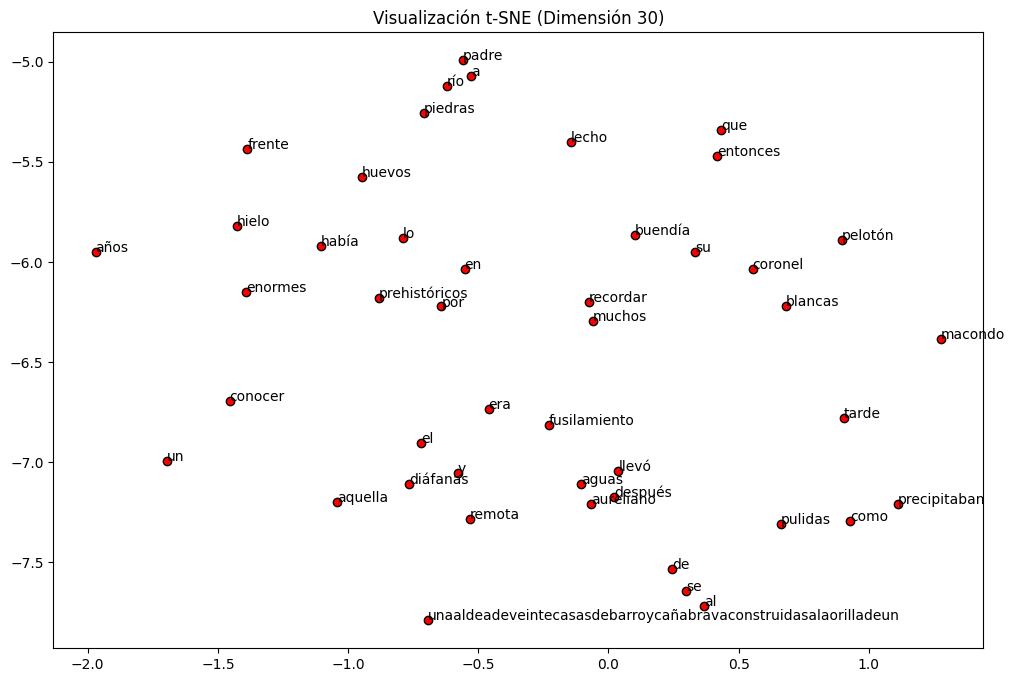

             
             
    Visualización con t-SNE (Dim 50)         
             


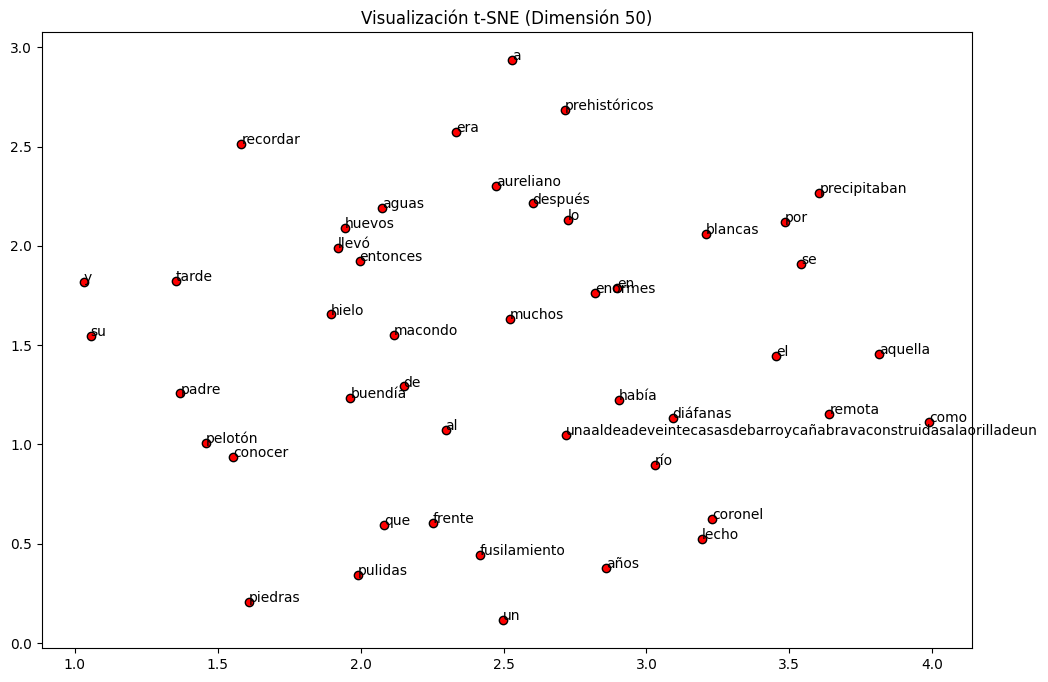

In [ ]:
# Función para visualizar palabras usando t-SNE
def visualizar_tsne(modelo, dimension):
    words = list(modelo.wv.index_to_key)
    vectors_tsne = TSNE(n_components=2, random_state=42).fit_transform(modelo.wv.vectors)

    plt.figure(figsize=(12, 8))
    plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], edgecolors='k', c='r')
    for word, (x, y) in zip(words, vectors_tsne):
        plt.text(x, y, word)

    plt.title(f'Visualización t-SNE (Dimensión {dimension})')
    plt.show()

# Visualizar palabras en el plano cartesiano para ambas dimensiones
print("             ")
print("    Visualización con t-SNE (Dim 30)         ")
print("             ")
visualizar_tsne(modelo_dim_30, dimension=30)
print("             ")
print("             ")
print("    Visualización con t-SNE (Dim 50)         ")
print("             ")
visualizar_tsne(modelo_dim_50, dimension=50)


### Distancia euclidiana entre 3 palabras

In [ ]:
import numpy as np

def euclidean_dist(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)


In [ ]:
# Palabras de interés
palabra1 = 'coronel'
palabra2 = 'padre'
palabra3 = 'hielo'

# Obtener vectores W1 + b1 para las palabras de interés
vector1 = modelo_dim_30.wv[palabra1] + modelo_dim_30.wv.get_normed_vectors()[modelo_dim_30.wv.key_to_index[palabra1]]
vector2 = modelo_dim_30.wv[palabra2] + modelo_dim_30.wv.get_normed_vectors()[modelo_dim_30.wv.key_to_index[palabra2]]
vector3 = modelo_dim_30.wv[palabra3] + modelo_dim_30.wv.get_normed_vectors()[modelo_dim_30.wv.key_to_index[palabra3]]

# Calcular distancias euclidianas
distancia_12 = euclidean_dist(vector1, vector2)
distancia_13 = euclidean_dist(vector1, vector3)
distancia_23 = euclidean_dist(vector2, vector3)

# Imprimir resultados
print(f'Distancia entre "{palabra1}" y "{palabra2}": {distancia_12}')
print(f'Distancia entre "{palabra1}" y "{palabra3}": {distancia_13}')
print(f'Distancia entre "{palabra2}" y "{palabra3}": {distancia_23}')


Distancia entre "coronel" y "padre": 1.7878971099853516
Distancia entre "coronel" y "hielo": 1.5038899183273315
Distancia entre "padre" y "hielo": 1.525566816329956
